## Importing the libraries and data

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
os.chdir(r'C:\Users\DELL\Downloads\Chitmonks')

In [4]:
# Reading the data
training_data = pd.read_csv("Google_Stock_Price_Train.csv")

In [5]:
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


## Data Preprocessing

In [6]:
# Checking the shape of the data
training_data.shape

(1258, 6)

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [8]:
# Descriptive Statistics
training_data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [9]:
# We'll work with open stock price only and take out the " open " stock column.

training_data = training_data.iloc[:, 1:2]

# The training_data is in the form of dataframe.
training_data.shape

(1258, 1)

In [10]:
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [11]:
# Feature Scaling (Normalization)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = scaler.fit_transform(training_data)
training_data_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [12]:
# Creating a data structure with 60 timestamps and 1 output
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i,0])
    
# Converting x_train and y_train into numpy array    
x_train,y_train = np.array(x_train),np.array(y_train)

print(x_train.shape)
print(y_train.shape)
#the x_train and y_train must have the same values to process RNN

(1198, 60)
(1198,)


In [13]:
# Reshaping dataset
# x_train should be a 3D array, hence reshaping the 2D to a 3D array.

x_train = np.reshape(x_train, (1198,60,1))
print(x_train.shape)

(1198, 60, 1)


## Building LSTM

In [14]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout

In [15]:
# Create model using LSTM, Dropout and Dense layer as an output layer. 
#Initializing the RNN
model = Sequential()

# 1st LSTM Layer
model.add(LSTM(units = 60,return_sequences = True,input_shape =(60,1)))
# Dropout layer
model.add(Dropout(0.2))
#The dropout drops connections of neurons to prevent overfitting. the neurons whose value falls under 0, will be removed.

# 2nd LSTM Layer
model.add(LSTM(units = 60,return_sequences = True))
# Dropout layer
model.add(Dropout(0.2))

# 3rd LSTM Layer
model.add(LSTM(units = 80,return_sequences = True))
# Dropout layer
model.add(Dropout(0.2))

# 4th LSTM Layer
model.add(LSTM(units = 120))
# Dropout layer
model.add(Dropout(0.2))

C:\Users\DELL\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Output Layer
model.add(Dense(units = 1))

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 60)              │          14,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 60)              │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,641 (725.16 KB)

 Trainable params: 185,641 (725.16 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

ADAM optimization algorithm is used and a mean squared error loss function is optimized. This will be the same metric that we will use to evaluate the performance of the model to find the global minimum error.

## Training the model

In [19]:
model.fit(x_train,y_train,batch_size = 32,epochs = 100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - loss: 0.0893
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0045
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0038
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 0.0040
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0035
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0034
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0033
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0047
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0032
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0029
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0034
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0035
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0042
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0036
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s

## Making Prediction 

In [26]:
test_df= pd.read_csv('Google_Stock_Price_Test.csv')
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [27]:
stock_price = test_df.iloc[:, 1:2].values

In [28]:
# Fetch 60 timesteps by combining train and test got prediction
# Concatination
total_df = pd.concat((training_data['Open'], test_df['Open']), axis = 0)

# stock prices of previous 60 days for each next day
inputs = total_df[len(total_df) - len(test_df) -  60:].values

# Reshape(converting numpy array)
inputs = inputs.reshape(-1, 1)

# Feature scaling
inputs = scaler.transform(inputs)

# Creating the test set
x_test = []
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])
    
# Converting numpy array
x_test = np.array(x_test)

# Converting into 3D array (required to process)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Getting Predicted Stock Prices
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

print(prediction[5]), print(stock_price[5])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
[804.65894]
[807.86]


(None, None)

## Evaluation

In [29]:
# Calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(stock_price, prediction)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 11.10309160312348


The output of the code will include the RMSE value, which indicates the average difference between the predicted and actual values. A lower RMSE value indicates better accuracy of the model.

## Visualizaton

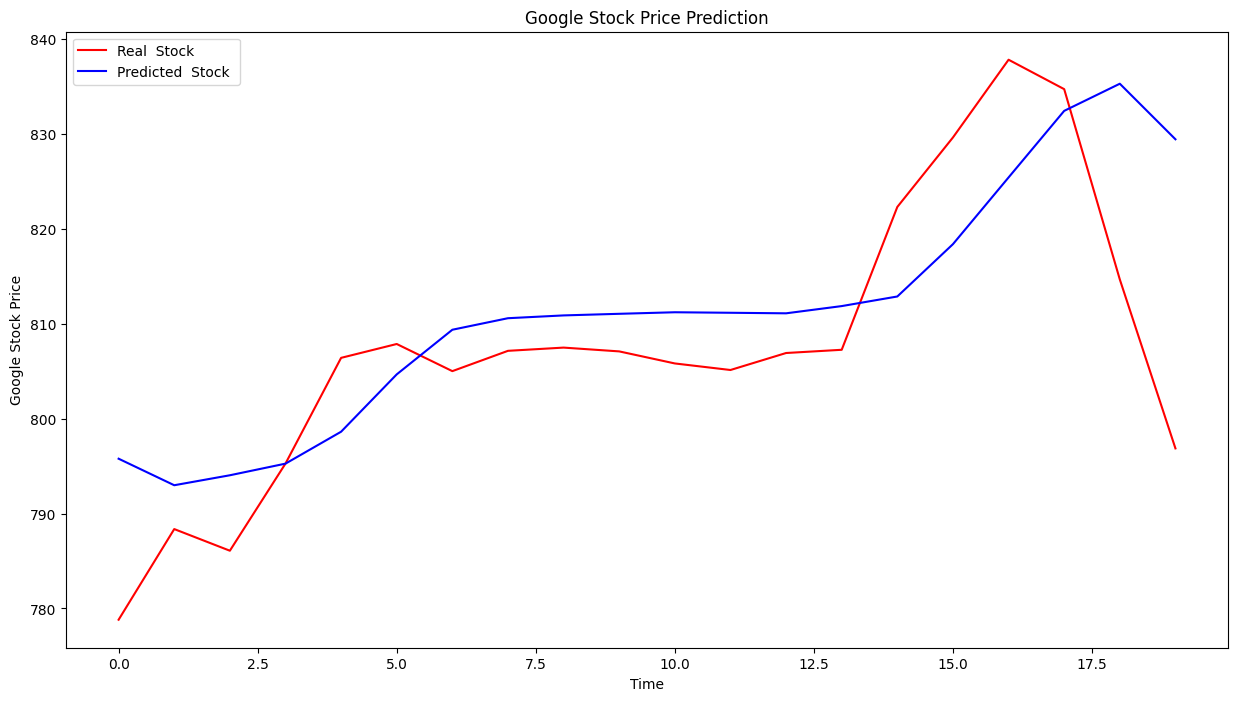

In [30]:
# Visualizing the results
plt.rcParams['figure.figsize'] = (15, 8)
plt.plot(stock_price, color = 'red', label = 'Real  Stock ')
plt.plot(prediction, color = 'blue', label = 'Predicted  Stock ')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()